##### Pandas Display Settings

In [ ]:
pd.set_option("display.max_colwidth",150)
pd.set_option('display.max_columns', None)

##### Imports

In [1]:
import pandas as pd
import numpy as np
import csv
import os
from temp_funcs import read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, filter_df, create_container_col, create_cond_df

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context = "notebook", style = "white", font="verdana") # font_scale = 1.35)

##### Graph Details

In [ ]:
region_order = ["MB", "PAL", "STRd", "STRv", "TH"]
layer_order = ["SNc", "SNr", "Gpe", "Gpi", "CP", "ACB", "MD", "VAL"]

##### Paths

In [3]:
# IVSCC Data Blitz directory
path_ivscc = "C:/Users/ramr/Documents/Github/analysis_projects/ivscc_data_blitz"

# Ephys features csv
path_ephys = os.path.join(path_ivscc, "ephys_features.csv")

# Main JEM directory
path_main_jem = "//allen/programs/celltypes/workgroups/279/Patch-Seq/compiled-jem-data"

# JEM csv files
path_jem = os.path.join(path_main_jem, "jem_metadata.csv")
path_jem_na = os.path.join(path_main_jem, "jem_metadata_tubeNA.csv")
path_jem_fail = os.path.join(path_main_jem, "jem_metadata_wFAILURE.csv")

# Shiny directory
path_shiny_mouse = "//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_current/mapping.df.with.bp.40.lastmap.csv"

In [4]:
fields_jem = ["name", "date", "organism_name", "container", "rigOperator", "status", "roi_major", "roi_minor"]
fields_ephys = ["b'name'", "b'vrest'", "b'ri'", "b'sag'", "b'tau'",
                "b'upstroke_downstroke_ratio_long_square'", "b'latency'", "b'f_i_curve_slope'"]
fields_shiny = ["sample_id", "cell_name", "percent_cdna_longer_than_400bp", "rna_amplification_pass_fail",
                "amplified_quantity_ng", "Genes.With.CPM", "marker_sum_norm_label", "Norm_Marker_Sum.0.4_label"]

In [5]:
jem = read_file(path_jem, fields_jem)
ephys = read_file(path_ephys, fields_ephys)
shiny_mouse = read_file(path_shiny_mouse, fields_shiny)

INFO:temp_funcs:Read file in as a pandas dataframe
INFO:temp_funcs:Read file in as a pandas dataframe
INFO:temp_funcs:Read file in as a pandas dataframe


In [6]:
jem

,organism_name,name,date,rigOperator,status,roi_major,roi_minor,container
0,Mouse,Oxtr-T2A-Cre;Ai14-351467.03.01.01,2017-10-02 10:46:00 -0700,lisak,SUCCESS (high confidence),VISp,layer 2/3,P9S4_171002_401_A01
1,Mouse,Oxtr-T2A-Cre;Ai14-351467.05.02.02,2017-10-02 10:54:00 -0700,lindsayn,SUCCESS (high confidence),VISp,layer 5,P8S4_171002_352_A01
2,Mouse,Oxtr-T2A-Cre;Ai14-351467.05.02.03,2017-10-02 10:54:00 -0700,lindsayn,SUCCESS (high confidence),VISp,layer 5,P8S4_171002_353_A01
3,Mouse,Oxtr-T2A-Cre;Ai14-351467.05.02.01,2017-10-02 10:54:00 -0700,lindsayn,SUCCESS (high confidence),VISp,layer 5,P8S4_171002_351_A01
4,Mouse,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350934.04.01.01,2017-10-02 11:30:00 -0700,rustym,SUCCESS (high confidence),VISp,layer 4,P2S4_171002_051_A01
...,...,...,...,...,...,...,...,...
15704,Human,H20.03.302.11.07.01.01.06,NaN,NaN,NaN,NaN,NaN,PMS4_200121_236_A01
15705,Human,H18.29.138.11.32.04,NaN,NaN,NaN,NaN,NaN,PHS4_181212_304_A01
15706,Human,H19.29.164.11.11.01,NaN,NaN,NaN,NaN,NaN,PHS4_191113_101_A01
15707,Macaca nemestrina,Q20.26.028.1A.22.04.02,NaN,NaN,NaN,NaN,NaN,PQS4_201216_328_A01


In [7]:
merge_sj = merge_dataframes(shiny_mouse, jem, "cell_name", "name", "inner")
merge_all = merge_dataframes(merge_sj, ephys, "cell_name", "b'name'", "inner")

INFO:temp_funcs:Merged two pandas dataframe into one dataframe
INFO:temp_funcs:Merged two pandas dataframe into one dataframe


In [8]:
merge_all = filter_date_range(merge_all, "date")

INFO:temp_funcs:Filtered dataframe: 2017-01-01 - 2021-12-31


In [9]:
merge_all["roi_major"].unique()

array(['VISp', 'MOp', 'TEa', 'HIP', 'RSPd', 'SSp', 'RSPv', 'CTXsp', 'ORB',
       'MOs', 'HY', 'RSP', 'PAL', 'STRd', 'EPI', 'MB'], dtype=object)

In [15]:
region_epi = filter_df(merge_all, "roi_major", "EPI") # LH, MH
region_pal = filter_df(merge_all, "roi_major", "PAL") # Gpi, Gpe
region_strd = filter_df(merge_all, "roi_major", "STRd") # CP
region_mb = filter_df(merge_all, "roi_major", "MB") # SNc, SNr

INFO:temp_funcs:Filtered dataframe based on roi_major == EPI
INFO:temp_funcs:Filtered dataframe based on roi_major == PAL
INFO:temp_funcs:Filtered dataframe based on roi_major == STRd
INFO:temp_funcs:Filtered dataframe based on roi_major == MB


In [17]:
region_pal

,sample_id,cell_name,percent_cdna_longer_than_400bp,rna_amplification_pass_fail,amplified_quantity_ng,Genes.With.CPM,marker_sum_norm_label,Norm_Marker_Sum.0.4_label,organism_name,name,date,rigOperator,status,roi_major,roi_minor,container,b'name',Vm(mV),Input Resistance(MΩ),Sag Fraction,τ(s),LS AP up/downstoke,Latency,F-I Curve
8374,P8S4_200902_351_A01,Vip-IRES-Cre;Ai14-542026.11.09.01,0.590,Pass,8.093233,7503,0.782385,True,Mouse,Vip-IRES-Cre;Ai14-542026.11.09.01,2020-09-02 11:00:04 -0700,lindsayn,SUCCESS,PAL,Gpi,P8S4_200902_351_A01,Vip-IRES-Cre;Ai14-542026.11.09.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7898,P8S4_200902_352_A01,Vip-IRES-Cre;Ai14-542026.11.09.02,0.551,Pass,9.887766,7403,0.759026,True,Mouse,Vip-IRES-Cre;Ai14-542026.11.09.02,2020-09-02 11:00:04 -0700,lindsayn,SUCCESS,PAL,Gpi,P8S4_200902_352_A01,Vip-IRES-Cre;Ai14-542026.11.09.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8002,PAS4_200915_452_A01,Slc17a8-iCre;Ai14-544246.10.09.01,0.407,Fail,5.312632,3692,0.286274,False,Mouse,Slc17a8-iCre;Ai14-544246.10.09.01,2020-09-15 15:10:07 -0700,ramr,SUCCESS,PAL,Gpi,PAS4_200915_452_A01,Slc17a8-iCre;Ai14-544246.10.09.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7896,PJS4_201002_802_A01,Sncg-IRES2-FlpO-neo;Ai65F-546568.07.06.01,0.701,Pass,23.619738,10786,0.807212,True,Mouse,Sncg-IRES2-FlpO-neo;Ai65F-546568.07.06.01,2020-10-02 14:09:18 -0700,sarav,SUCCESS,PAL,Gpi,PJS4_201002_802_A01,Sncg-IRES2-FlpO-neo;Ai65F-546568.07.06.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8518,PJS4_201002_803_A01,Sncg-IRES2-FlpO-neo;Ai65F-546568.07.06.02,0.618,Pass,14.048747,7851,0.515747,True,Mouse,Sncg-IRES2-FlpO-neo;Ai65F-546568.07.06.02,2020-10-02 14:09:18 -0700,sarav,SUCCESS,PAL,Gpi,PJS4_201002_803_A01,Sncg-IRES2-FlpO-neo;Ai65F-546568.07.06.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8519,PJS4_201013_803_A01,Rbp4-Cre_KL100;Ai14-548734.10.09.01,0.678,Pass,22.057752,9349,0.823519,True,Mouse,Rbp4-Cre_KL100;Ai14-548734.10.09.01,2020-10-13 15:16:41 -0700,sarav,SUCCESS,PAL,Gpi,PJS4_201013_803_A01,Rbp4-Cre_KL100;Ai14-548734.10.09.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8520,PJS4_201013_804_A01,Rbp4-Cre_KL100;Ai14-548734.10.09.02,0.584,Pass,9.478461,7123,0.613572,True,Mouse,Rbp4-Cre_KL100;Ai14-548734.10.09.02,2020-10-13 15:16:41 -0700,sarav,SUCCESS,PAL,Gpi,PJS4_201013_804_A01,Rbp4-Cre_KL100;Ai14-548734.10.09.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6946,PJS4_201013_805_A01,Rbp4-Cre_KL100;Ai14-548735.07.06.01,0.645,Pass,20.697472,10266,0.732145,True,Mouse,Rbp4-Cre_KL100;Ai14-548735.07.06.01,2020-10-13 17:12:42 -0700,sarav,SUCCESS,PAL,Gpi,PJS4_201013_805_A01,Rbp4-Cre_KL100;Ai14-548735.07.06.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8502,PES4_201014_651_A01,Vip-IRES-Cre;Ai14-548765.05.06.01,0.655,Pass,18.611196,9961,0.647070,True,Mouse,Vip-IRES-Cre;Ai14-548765.05.06.01,2020-10-14 11:10:52 -0700,katherineb,SUCCESS,PAL,Gpi,PES4_201014_651_A01,Vip-IRES-Cre;Ai14-548765.05.06.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8503,PES4_201015_652_A01,Vip-IRES-Cre;Ai14-548766.08.06.01,0.632,Pass,22.612228,10885,0.698487,True,Mouse,Vip-IRES-Cre;Ai14-548766.08.06.01,2020-10-15 15:10:05 -0700,katherineb,SUCCESS,PAL,Gpi,PES4_201015_652_A01,Vip-IRES-Cre;Ai14-548766.08.06.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#merge_all = filter_df(merge_all, "roi_major", "EPI")
merge_all

,sample_id,cell_name,percent_cdna_longer_than_400bp,rna_amplification_pass_fail,amplified_quantity_ng,Genes.With.CPM,marker_sum_norm_label,Norm_Marker_Sum.0.4_label,organism_name,name,date,rigOperator,status,roi_major,roi_minor,container,b'name',b'vrest',b'ri',b'sag',b'tau',b'upstroke_downstroke_ratio_long_square',b'latency',b'f_i_curve_slope'
6654,P9S4_171002_401_A01,Oxtr-T2A-Cre;Ai14-351467.03.01.01,0.623,Pass,15.497830,7573,0.728375,True,Mouse,Oxtr-T2A-Cre;Ai14-351467.03.01.01,2017-10-02 10:46:00 -0700,lisak,SUCCESS (high confidence),VISp,layer 2/3,P9S4_171002_401_A01,Oxtr-T2A-Cre;Ai14-351467.03.01.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8120,P8S4_171002_353_A01,Oxtr-T2A-Cre;Ai14-351467.05.02.03,0.609,Pass,19.133617,7071,0.255156,False,Mouse,Oxtr-T2A-Cre;Ai14-351467.05.02.03,2017-10-02 10:54:00 -0700,lindsayn,SUCCESS (high confidence),VISp,layer 5,P8S4_171002_353_A01,Oxtr-T2A-Cre;Ai14-351467.05.02.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9088,P8S4_171002_352_A01,Oxtr-T2A-Cre;Ai14-351467.05.02.02,0.295,Fail,5.983558,2941,0.220132,False,Mouse,Oxtr-T2A-Cre;Ai14-351467.05.02.02,2017-10-02 10:54:00 -0700,lindsayn,SUCCESS (high confidence),VISp,layer 5,P8S4_171002_352_A01,Oxtr-T2A-Cre;Ai14-351467.05.02.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6521,P8S4_171002_351_A01,Oxtr-T2A-Cre;Ai14-351467.05.02.01,0.314,Pass,10.796252,5200,0.543619,True,Mouse,Oxtr-T2A-Cre;Ai14-351467.05.02.01,2017-10-02 10:54:00 -0700,lindsayn,SUCCESS (high confidence),VISp,layer 5,P8S4_171002_351_A01,Oxtr-T2A-Cre;Ai14-351467.05.02.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7575,P2S4_171002_051_A01,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350934.04.01.01,0.418,Pass,9.003266,5349,0.603677,True,Mouse,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350934.04.01.01,2017-10-02 11:30:00 -0700,rustym,SUCCESS (high confidence),VISp,layer 4,P2S4_171002_051_A01,Nos1-CreERT2;Sst-IRES-FlpO;Ai65-350934.04.01.01,-72.851803,302.790135,0.024932,30.061544,3.729371,0.03104,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,PAS4_201119_455_A01,Sst-IRES-Cre;Ai14-554002.07.06.01,0.517,Pass,9.851649,6772,0.678235,True,Mouse,Sst-IRES-Cre;Ai14-554002.07.06.01,2020-11-19 15:50:49 -0800,ramr,SUCCESS,PAL,Gpi,PAS4_201119_455_A01,Sst-IRES-Cre;Ai14-554002.07.06.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8572,PJS4_201120_801_A01,Esr2-IRES2-Cre;Ai14-554657.08.09.01,0.420,Fail,4.303850,4498,0.255328,False,Mouse,Esr2-IRES2-Cre;Ai14-554657.08.09.01,2020-11-20 10:32:19 -0800,sarav,SUCCESS,EPI,LH,PJS4_201120_801_A01,Esr2-IRES2-Cre;Ai14-554657.08.09.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8450,PAS4_201120_451_A01,Slc17a7-IRES2-Cre;Ai14-554627.09.09.01,0.683,Pass,21.272269,8862,0.410554,True,Mouse,Slc17a7-IRES2-Cre;Ai14-554627.09.09.01,2020-11-20 15:25:59 -0800,ramr,SUCCESS,EPI,LH,PAS4_201120_451_A01,Slc17a7-IRES2-Cre;Ai14-554627.09.09.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8896,PAS4_201123_451_A01,Slc17a8-iCre;Ai14-554949.06.09.01,0.385,Pass,11.604409,4470,0.114795,False,Mouse,Slc17a8-iCre;Ai14-554949.06.09.01,2020-11-23 10:26:09 -0800,ramr,SUCCESS,MB,SNc,PAS4_201123_451_A01,Slc17a8-iCre;Ai14-554949.06.09.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
merge_all.rename(columns={"b'vrest'": "Vm(mV)", "b'ri'": "Input Resistance(MΩ)",
                          "b'sag'" : "Sag Fraction", "b'tau'": "τ(s)",
                          "b'upstroke_downstroke_ratio_long_square'": "LS AP up/downstoke", 
                          "b'latency'" : "Latency",
                          "b'f_i_curve_slope'" : "F-I Curve"}, inplace=True)

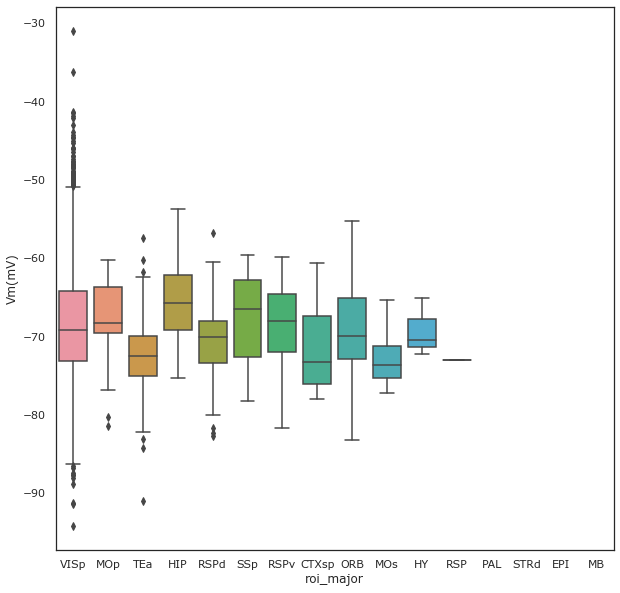

In [18]:
f, axes = plt.subplots(figsize = (10, 10))

ax = sns.boxplot(x="roi_major", y="Vm(mV)", data=merge_all)